## START

#Plot the improvement of the models performance
- Data representation - every 3 months - seasonality
- 

In [11]:
import pandas as pd
import pyreadr
import numpy as np
# import torch
import pickle
from os import listdir
from os.path import isfile, join


from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error



#internal validation
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, PredefinedSplit, RandomizedSearchCV


#performance metrices
from sklearn.metrics import precision_recall_curve, make_scorer, confusion_matrix, classification_report, f1_score, balanced_accuracy_score, r2_score, auc, average_precision_score, roc_auc_score, recall_score, roc_curve, accuracy_score

#Models selection
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# from cuml.svm import SVC #gpu-powered SVM

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional, Input, concatenate, Reshape, Activation, Flatten, Add, BatchNormalization, Multiply, LeakyReLU
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.metrics import AUC, SensitivityAtSpecificity
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, Adamax, SGD, Adadelta
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import L1L2, L1, L2


#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


random_state = 42
tf.random.set_seed(random_state)

In [ ]:
# demographic_data = pickle.load(open('../FinalData/cleaned_features_2vs1_15022024.sav', 'rb'))
# demographic_data = demographic_data[['patid', 'practice_id', 'sex', 'age', 'BMI', 'weight', 'height',
#        'ethnicity', 'ethnic_group', 'smokingStatus', 'postcode_district', 'imd_decile',
#        'Country', 'County', 'LocalAuthority', 'OutputAreaClassification',
#        'system']]

In [ ]:
compound_features = ['feature_asthmaAttacks_', 'feature_numAntibiotics_', 'feature_numAntibioticswithLRTI_', 
 'feature_numOCS_', 'feature_numOCSwithLRTI_', 'feature_numHospitals_', 'feature_acuteRespEvents_']

In [ ]:
files = listdir('../PrepareDataNewTabSeq/CompoundFeaturesLong/')
for feature in compound_features:
    for i in range(1,75):
        result = []
        for file in files:
            if feature+str(i)+'_' in file:
                result.append(file)
        # if len(result) < 120:
        print(feature, i, len(result))

In [ ]:
#1 numAsthmaAttack
start_file = 1
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_asthmaAttacks_' + str(i) + '_1.Rdata')
    x1=x1['feature_asthmaAttacks']
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_asthmaAttacks_' + str(i) + '_2.Rdata')
    x2=x2['feature_asthmaAttacks']
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_asthmaAttacks_'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_asthmaAttacks']
        x_temp = x_temp.rename(columns={'numAsthmaAttacks' : 'numAsthmaAttacks_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#2 numAntibiotics
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numAntibiotics_' + str(i) + '_1.Rdata')
    x1=x1['feature_numAntibiotics']
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numAntibiotics_' + str(i) + '_2.Rdata')
    x2=x2['feature_numAntibiotics']
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numAntibiotics_'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_numAntibiotics']
        x_temp = x_temp.rename(columns={'numAntibioticsEvents' : 'numAntibioticsEvents_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#3 numAntibioticswithLRTI
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numAntibioticswithLRTI_' + str(i) + '_1.Rdata')
    x1=x1['feature_numAntibioticswithLRTI']
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numAntibioticswithLRTI_' + str(i) + '_2.Rdata')
    x2=x2['feature_numAntibioticswithLRTI']
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numAntibioticswithLRTI_'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_numAntibioticswithLRTI']
        x_temp = x_temp.rename(columns={'numAntibioticswithLRTI' : 'numAntibioticswithLRTI_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#4 numOCS
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numOCS_' + str(i) + '_1.Rdata')
    x1=x1['feature_numOCS']
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numOCS_' + str(i) + '_2.Rdata')
    x2=x2['feature_numOCS']
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numOCS_'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_numOCS']
        x_temp = x_temp.rename(columns={'numOCSEvents' : 'numOCSEvents_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#5 numOCSswithLRTI
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numOCSwithLRTI_' + str(i) + '_1.Rdata')
    x1=x1['feature_numOCSwithLRTI']
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numOCSwithLRTI_' + str(i) + '_2.Rdata')
    x2=x2['feature_numOCSwithLRTI']
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numOCSwithLRTI_'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_numOCSwithLRTI']
        x_temp = x_temp.rename(columns={'numOCSwithLRTI' : 'numOCSwithLRTI_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#6 numHospital
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numHospitals_' + str(i) + '_1.Rdata')
    x1=x1['feature_numHospitals']
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numHospitals_' + str(i) + '_2.Rdata')
    x2=x2['feature_numHospitals']
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/CompoundFeaturesLong/feature_numHospitals_'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_numHospitals']
        x_temp = x_temp.rename(columns={'numHospEvents' : 'numHospEvents_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#7 ICS - prescribed daily ICS & 8 average daily ICS
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/ICS_infoLong/feature_ICSinfo' + str(i) + '_1.Rdata')
    x1=x1['feature_ICSinfo'][['patid', 'average_daily_dose_ICS','prescribed_daily_dose_ICS']]
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/ICS_infoLong/feature_ICSinfo' + str(i) + '_2.Rdata')
    x2=x2['feature_ICSinfo'][['patid', 'average_daily_dose_ICS','prescribed_daily_dose_ICS']]
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/ICS_infoLong/feature_ICSinfo'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_ICSinfo'][['patid', 'average_daily_dose_ICS','prescribed_daily_dose_ICS']]
        x_temp = x_temp.rename(columns={'prescribed_daily_dose_ICS' : 'prescribed_daily_dose_ICS_month'+str(j),
                                       'average_daily_dose_ICS' : 'average_daily_dose_ICS_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#9 BTS
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/BTS_StepNewLong/feature_BTSstep_' + str(i) + '_1.Rdata')
    x1=x1['feature_BTSstep'][['patid', 'BTS_step']]
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/BTS_StepNewLong/feature_BTSstep_' + str(i) + '_2.Rdata')
    x2=x2['feature_BTSstep'][['patid', 'BTS_step']]
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/BTS_StepNewLong/feature_BTSstep_'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_BTSstep'][['patid', 'BTS_step']]
        x_temp = x_temp.rename(columns={'BTS_step' : 'BTS_step_month'+str(j)})
        # print(x_temp['numAsthmaAttacks_month'+str(j)].value_counts())
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#10 Primary consultation
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/PrimaryCareConsultsLong/feature_primarycare' + str(i) + '_1.Rdata')
    x1=x1['feature_primarycare'][['patid', 'numPCS']]
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/PrimaryCareConsultsLong/feature_primarycare' + str(i) + '_2.Rdata')
    x2=x2['feature_primarycare'][['patid', 'numPCS']]
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/PrimaryCareConsultsLong/feature_primarycare'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_primarycare'][['patid', 'numPCS']]
        x_temp = x_temp.rename(columns={'numPCS' : 'numPCS_month'+str(j)})
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
#11 asthma related primary care consultation
for i in range(start_file,75):
    x1=pyreadr.read_r('../PrepareDataNewTabSeq/PrimaryCareConsultsAsthmaLong/feature_primarycareasthma' + str(i) + '_1.Rdata')
    x1=x1['feature_primarycareasthma'][['patid', 'numPCS']]
    x2=pyreadr.read_r('../PrepareDataNewTabSeq/PrimaryCareConsultsAsthmaLong/feature_primarycareasthma' + str(i) + '_2.Rdata')
    x2=x2['feature_primarycareasthma'][['patid', 'numPCS']]
    x = x1.merge(x2, on='patid', how='outer', suffixes=['_month1','_month2']).fillna(0).drop_duplicates('patid').reset_index(drop=True)
    x = x.rename(columns={'numPCS_month1' : 'numPCSAsthma_month1',
                          'numPCS_month2' : 'numPCSAsthma_month2'})
    for j in range(3,121):
        print('chunk: ', i, ', month: ', j)
        x_temp=pyreadr.read_r('../PrepareDataNewTabSeq/PrimaryCareConsultsAsthmaLong/feature_primarycareasthma'+ str(i) + '_' + str(j)+'.Rdata')
        x_temp=x_temp['feature_primarycareasthma'][['patid', 'numPCS']]
        x_temp = x_temp.rename(columns={'numPCS' : 'numPCSAsthma_month'+str(j)})
        x = x.merge(x_temp, on='patid', how='outer').fillna(0).drop_duplicates('patid').reset_index(drop=True)
    features = pd.concat([features, x]).fillna(0).drop_duplicates('patid').reset_index(drop=True)

In [ ]:
features.shape

In [ ]:
pickle.dump(features, open('../Clean_data/sequence_features_long_full.sav', 'wb'))

# MODEL

In [2]:
#for outer product
def outer_product(inputs): #function to merge
    return tf.einsum('bi,bj->bij', inputs[0], inputs[1])
    
def modelCombined(X, tab):
    
###################################################################################################################################################            
        #tabular data - demography 
        neurons_layer1=64
        input1 = Input(shape=(tab.shape[1],))
        nn = Dense(units=neurons_layer1, 
                    input_shape = (tab.shape[1],)
                   )(input1)
        nn = BatchNormalization()(nn)
        nn = Activation("relu")(nn)
        nn = Dropout(.3)(nn)
        


###################################################################################################################################################                

        # LSTM - layer 1
        
        input2 = Input(shape=(X.shape[1], X.shape[2]))
        lstm = Bidirectional(LSTM(units=32, 
                            return_sequences=True,
                                 )
                            )(input2)
        lstm = Dropout(.3)(lstm)
        

        # LSTM - layer 2
        lstm = Bidirectional(LSTM(units=32, 
                            return_sequences=True,
                                 )
                            )(lstm)
        lstm = Dropout(.3)(lstm)

        # LSTM - layer 3
        lstm = Bidirectional(LSTM(units=16, 
                            # return_sequences=True,
                                 )
                            )(lstm)
        lstm = Dropout(.3)(lstm)

        #dense layer before merging
        lstm = Dense(units=64, 
                   )(lstm)
        lstm = BatchNormalization()(lstm)
        lstm = Activation("relu")(lstm)
        
        
###################################################################################################################################################        

        
        #merge tabular and sequence layers
        # nn = Reshape((1, 64))(nn) #reshape the nn product to be concatenated with LSTM product
        add = concatenate([nn, lstm], axis=1)

        #Addition
        add = Add()([nn, lstm]) #.8062


####################################################################################################################################
    ## FCN before classification layer
        final = Dense(units=16)(add)
        final = BatchNormalization()(final)
        final = Activation("relu")(final)
        final = Dropout(0.3)(final)     
        
                                                    
        ###layer 5 - classification layer
        # final = Flatten()(add)
        output = Dense(1, activation='sigmoid')(final)
        

        opt = Adam(learning_rate=1e-2)
        # opt = RMSprop(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, weight_decay=weight_decay)

        metrics = [
            AUC(num_thresholds=1000, name='auc', curve='ROC'),
            AUC(num_thresholds=1000, name='auprc', curve='PR'),
        ]


        model = Model(inputs=[input1, input2], outputs=output)
        model.compile(
            loss='binary_crossentropy', 
            optimizer=opt, 
            metrics=metrics)
        # print(model.summary())
        return model
    
start_time = time.time()

#run tuner

#free up memory
sequence_data = []


NameError: name 'time' is not defined

In [ ]:


#=========================================================================RETRAIN==============================================

def summariseResult (testTab, testX, testY, model):
    preds = model.predict([testTab, testX])
    # preds = [0 if x < 0.5 else 1 for x in preds]
    preds = [x for x in preds]
    # tn, fp, fn, tp = confusion_matrix(testY, preds).ravel()
    # specificity = tn / (tn+fp)
    # sensitivity = tp / (tp+fn)
    # ppv = 100*tp/(tp+fp)
    # npv = 100*tn/(fn+tn)
    # acc = accuracy_score(testY, preds)
    # f1score = f1_score(testY, preds, average = 'binary')
    # balanceacc = balanced_accuracy_score(testY, preds)
    fpr, tpr, thresholds = roc_curve(testY, preds, pos_label=1)
    # aucscore = auc(fpr, tpr)
    aucscore = roc_auc_score(testY, preds)
    auprc = average_precision_score(testY, preds)
    # plot_confusion_matrix(model, testX, testY, cmap='viridis')  
    return np.round(aucscore,4), np.round(auprc,4)



# Define a custom learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.01
    if epoch < 10:
        return initial_lr
    elif epoch < 20:
        return initial_lr * 0.1
    else:
        return initial_lr * 0.01



In [ ]:


#parameters setting
summary_result_internalVal = []
summary_result_externalVal = []
cols = ['model_name', 'fold', 'outcome', 'class_ratio', 'auc', 'auprc']
n_splits = 5
batch_size = 256
patience = 10
epochs = 1000
target_outcomes = [
    'outcome_12months',
    'outcome_3months', 'outcome_6months', 'outcome_9months', 
    
] 

#start CV
for target_outcome in target_outcomes:
    print(target_outcome)
    gridSearch_X, crossVal_X, internalEvaluation_X, externalEvaluation_X, gridSearch_tab, crossVal_tab, internalEvaluation_tab, externalEvaluation_tab, gridSearch_y, crossVal_y, internalEvaluation_y, externalEvaluation_y = pickle.load(open('../../Clean_data/seasonal_dataset_ordinal_'+target_outcome+'.sav', 'rb'))

    X = np.concatenate((gridSearch_X, crossVal_X))
    tab = np.concatenate((gridSearch_tab, crossVal_tab))
    y = np.concatenate((gridSearch_y, crossVal_y))

    X = X[:, :9, :] #select only data from the last 2 years
    internalEvaluation_X = internalEvaluation_X[:, :9, :]
    externalEvaluation_X = externalEvaluation_X[:, :9, :]

    print(tab.shape)
    print(X.shape)
    print(y.shape)
    
    unique, counts = np.unique(y, return_counts=True)
    event_rate = counts[1]/len(y)
    
    print(f'event rate: {event_rate}')

    #split data
    fold='99'
    print(f'fold: {fold}')

    
    # with tf.device('/GPU:0'):
    model = modelCombined(X, tab)
    model.summary()
    # plot_model(model, to_file='../../MODELS/TestResultOrdinal/LSTM_simple_plot.png', show_shapes=True, show_layer_names=True)

    earlyStopping = EarlyStopping(monitor='val_auc', patience=patience, verbose=1, mode='max', restore_best_weights=True)
    mcp_save = ModelCheckpoint('../../MODELS/TestResultOrdinal/lstm_2years_new'+ target_outcome +'.keras', save_best_only=True, monitor='val_auc', mode='max') #not needed in CV
    pos_weight = counts[0]/counts[1]
    class_weight = {0:1, 1:pos_weight}
    # Instantiate the scheduler
    lr_scheduler = LearningRateScheduler(lr_schedule)




    history = model.fit([tab, X], y,
                        validation_split=.2,
                        # validation_data=([val_tab, val_X], val_y),
                        epochs=epochs, batch_size=batch_size, class_weight=class_weight, callbacks = [lr_scheduler, earlyStopping, mcp_save])

    pickle.dump(history, open('../../MODELS/TestResultOrdinal/history_2years_new'+target_outcome+'.sav', 'wb'))
        
    modelname = 'LSTM'
    summary_result_internalVal.append((modelname, fold, target_outcome, event_rate, ) + summariseResult (internalEvaluation_tab, internalEvaluation_X, internalEvaluation_y, model))
    summary_result_externalVal.append((modelname, fold, target_outcome, event_rate, ) + summariseResult (externalEvaluation_tab, externalEvaluation_X, externalEvaluation_y, model))
        # with tf.device('/GPU:0'):
        #     print(best_models.evaluate([internalEvaluation_tab, internalEvaluation_X], internalEvaluation_y))
        #     print(best_models.evaluate([externalEvaluation_tab, externalEvaluation_X], externalEvaluation_y))



summary_result_internalVal = pd.DataFrame(summary_result_internalVal, columns=cols)
summary_result_internalVal['model_num'] = summary_result_internalVal.index
summary_result_internalVal.to_csv('../../MODELS/internalValResultLSTMOrdinal_2years_new.csv', index_label=False, index=False)

summary_result_externalVal = pd.DataFrame(summary_result_externalVal, columns=cols)
summary_result_externalVal['model_num'] = summary_result_externalVal.index
summary_result_externalVal.to_csv('../../MODELS/externalValResultLSTMOrdinal_2years_new.csv', index_label=False, index=False)

print("#########################FINISH##############################")

print("--- Training time: %s seconds ---" % (time.time() - start_time))









## LOAD DATA for Classical ML

In [25]:
gridSearchData, crossValData, internalEvaluationData, externalEvaluationData = pickle.load(open('../../Clean_data/dataset_scaled_ordinal.sav', 'rb'))
# features = pd.read_csv('../../Clean_data/data_features_2vs1_2016-2018_21102024.csv', low_memory=False)

#Define feature candidates

features_columns = gridSearchData.columns.to_list()
exclude_columns = ['patid', 'practice_id', 'set', #identifier
                   'BMI', #use the categorical instead
                   'ethnicity', #use ethnic_group instead
                   'Spacer',  #all zero
                   'asthmaPlan', #use the continuous one
                   
                   'outcome_3months', 'outcome_6months', 'outcome_9months', 'outcome_12months', 'outcome_15months', 'outcome_18months', 
                   'outcome_21months', 'outcome_24months', 'outcome_combined_6months', 'outcome_combined_9months', 'outcome_combined_12months', 
                   'outcome_combined_15months', 'outcome_combined_18months', 'outcome_combined_24months', '3months', '6months', '12months', '24months', #outcomes variable
                   
                   'postcode_district', 'County', 'LocalAuthority', 'OutputAreaClassification', #location related variables, use IMD decile only
                   
                   'age_cat', 'ICS_medication_possesion_ratio_cat', 'numOCS_cat', 'numOCSEvents_cat', 'numOCSwithLRTI_cat', 'numAcuteRespEvents_cat', 
                   'numAntibioticsEvents_cat', 'numAntibioticswithLRTI_cat', 'numAsthmaAttacks_cat', 'numHospEvents_cat', 'numPCS_cat', 'numPCSAsthma_cat', 
                   'numAsthmaManagement_cat', 'numAsthmaReview_cat', 'numAsthmaMedReview_cat', 'numAsthmaReviewRCP_cat', 'average_daily_dose_ICS_cat', 
                   'prescribed_daily_dose_ICS_cat', #use continous vars instead
                   
                   'count_rhinitis', 'count_cardiovascular', 'count_heartfailure',
                   'count_psoriasis', 'count_anaphylaxis', 'count_diabetes', 'count_ihd',
                   'count_anxiety', 'count_eczema', 'count_nasalpolyps',
                   'count_paracetamol', 'count_nsaids', 'count_betablocker', #use binary ones
                   
                   'paracetamol', 'nsaids', 'betablocker', #no data in evaluation
                   'numAsthmaMedReview', 'numAsthmaReviewRCP',
                                      
                  ]
# exclude_columns = exclude_columns + [x for x in features_columns if '_count' in x] #filter out commorbid count variables
features_columns = [x for x in features_columns if x not in exclude_columns]
print('Features size: ', len(features_columns))
print(features_columns)



X = crossValData[features_columns]
X_internalVal = internalEvaluationData[features_columns]
X_externalVal = externalEvaluationData[features_columns]


print(X.shape)
print(X_internalVal.shape)
print(X_externalVal.shape)


target_outcomes = [
    'outcome_3months', 'outcome_6months', 'outcome_9months', 
    'outcome_12months',
] 
# target_outcomes = ['12months'] 
model_names = [
    'LR', 'Lasso', 'ElasticNet', 
    'DT', 'RF', 
    'XGB'
              ]

Features size:  48
['sex', 'rhinitis', 'cardiovascular', 'heartfailure', 'psoriasis', 'anaphylaxis', 'diabetes', 'ihd', 'anxiety', 'eczema', 'nasalpolyps', 'ethnic_group_Asian', 'ethnic_group_Black', 'ethnic_group_Mixed', 'ethnic_group_Other', 'ethnic_group_White', 'ethnic_group_not recorded', 'smokingStatus_current', 'smokingStatus_former', 'smokingStatus_never', 'DeviceType_BAI', 'DeviceType_DPI', 'DeviceType_NEB', 'DeviceType_not recorded', 'DeviceType_pMDI', 'PriorEducation_No', 'PriorEducation_Yes', 'age', 'average_daily_dose_ICS', 'prescribed_daily_dose_ICS', 'ICS_medication_possesion_ratio', 'numPCS', 'numPCSAsthma', 'numAntibioticsEvents', 'numAntibioticswithLRTI', 'numOCSEvents', 'numOCSwithLRTI', 'numAsthmaAttacks', 'numAcuteRespEvents', 'numHospEvents', 'numAsthmaManagement', 'numAsthmaReview', 'imd_decile', 'CharlsonScore', 'BTS_step', 'BMI_cat', 'PEFStatus', 'EosinophilLevel']


## LOAD MODEL

[21:06:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 10s 14ms/step


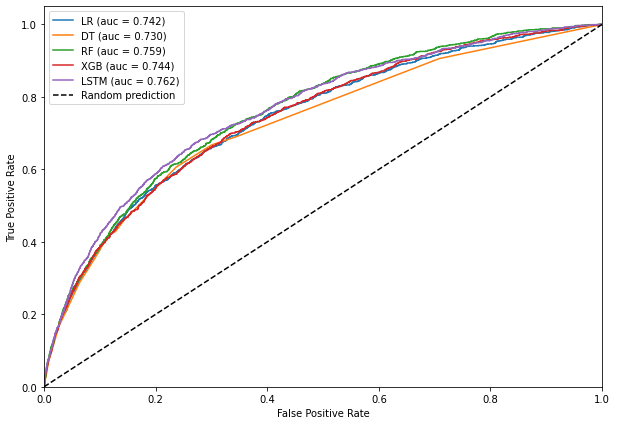

[21:07:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 9s 13ms/step


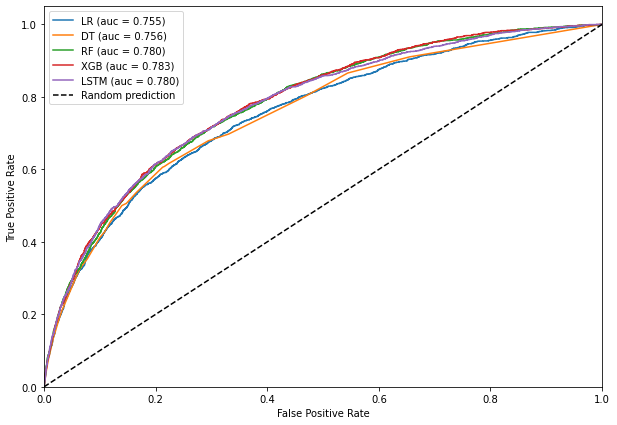

[21:07:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 10s 14ms/step


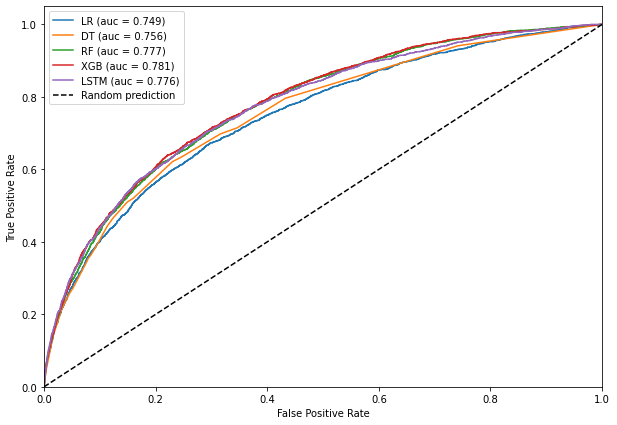

[21:07:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 10s 14ms/step


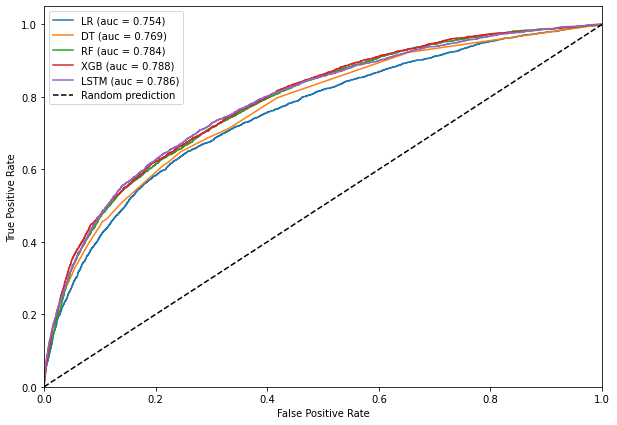

In [134]:
for target_outcome in target_outcomes:
    y_externalVal = externalEvaluationData[[target_outcome]]
    gridSearch_X, crossVal_X, internalEvaluation_X, externalEvaluation_X, gridSearch_tab, crossVal_tab, internalEvaluation_tab, externalEvaluation_tab, gridSearch_y, crossVal_y, internalEvaluation_y, externalEvaluation_y = pickle.load(open('../../Clean_data/seasonal_dataset_ordinal_'+target_outcome+'.sav', 'rb'))
    lr_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_LR.sav', 'rb'))
    dt_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_DT.sav', 'rb'))
    rf_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_RF.sav', 'rb'))
    xgb_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_XGB.sav', 'rb'))
    lstm_model = load_model('../../MODELS/TestResultOrdinal/lstm_2years_new'+target_outcome+'.keras')
    
    #PLOT
    # Calculate ROC curve
    plt.figure(figsize=(10,7))

    #LR model
    preds2 = lr_model.predict_proba(X_externalVal)
    preds2 = [x[1] for x in preds2]
    fpr2, tpr2, thresholds2 = roc_curve(y_externalVal.values, preds2) 
    roc_auc2 = auc(fpr2, tpr2)
    plt.plot(fpr2, tpr2, label='LR (auc = %0.3f)' % roc_auc2)

    #dt model
    preds3 = dt_model.predict_proba(X_externalVal)
    preds3 = [x[1] for x in preds3]
    fpr3, tpr3, thresholds3 = roc_curve(y_externalVal.values, preds3) 
    roc_auc3 = auc(fpr3, tpr3)
    plt.plot(fpr3, tpr3, label='DT (auc = %0.3f)' % roc_auc3)

    #rf model
    preds4 = rf_model.predict_proba(X_externalVal)
    preds4 = [x[1] for x in preds4]
    fpr4, tpr4, thresholds4 = roc_curve(y_externalVal.values, preds4) 
    roc_auc4 = auc(fpr4, tpr4)
    plt.plot(fpr4, tpr4, label='RF (auc = %0.3f)' % roc_auc4)

    #XGBoost all
    preds5 = xgb_model.predict_proba(X_externalVal)
    preds5 = [x[1] for x in preds5]
    fpr5, tpr5, thresholds5 = roc_curve(y_externalVal.values, preds5) 
    roc_auc5 = auc(fpr5, tpr5)
    plt.plot(fpr5, tpr5, label='XGB (auc = %0.3f)' % roc_auc5)

    #LSTM
    preds6 = lstm_model.predict([externalEvaluation_tab, externalEvaluation_X[:, :9, :]])
    preds6 = [x for x in preds6]
    fpr6, tpr6, thresholds6 = roc_curve(externalEvaluation_y, preds6) 
    roc_auc6 = auc(fpr6, tpr6)
    plt.plot(fpr6, tpr6, label='LSTM (auc = %0.3f)' % roc_auc6)


    plt.plot([0, 1], [0, 1], 'k--', label='Random prediction')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve Comparison')
    plt.legend()
    plt.show()

[21:08:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 10s 13ms/step


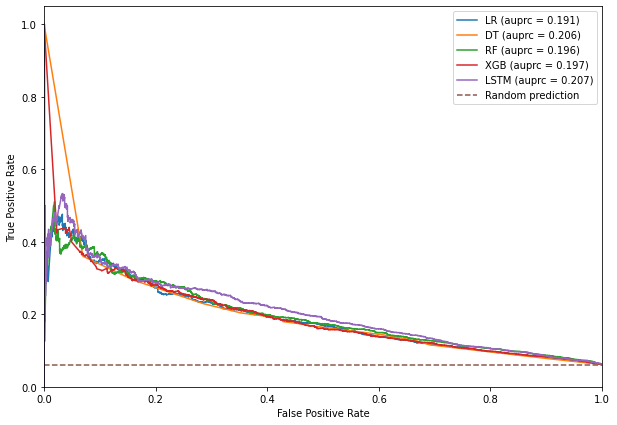

[21:08:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 12s 14ms/step


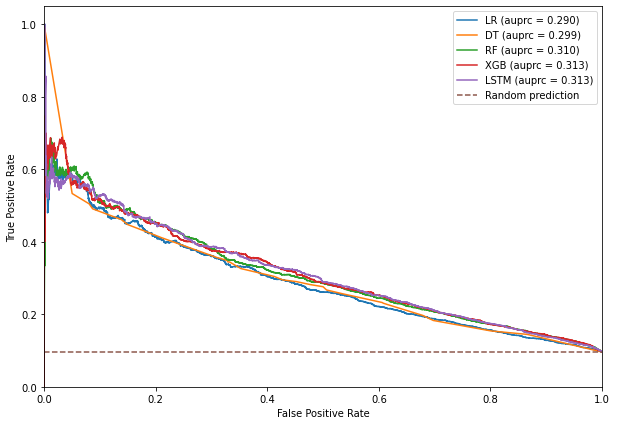

[21:08:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 11s 15ms/step


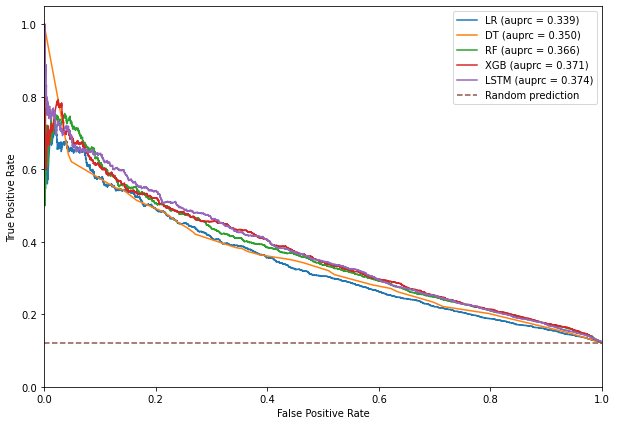

[21:09:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
615/615 [==============================] - 10s 15ms/step


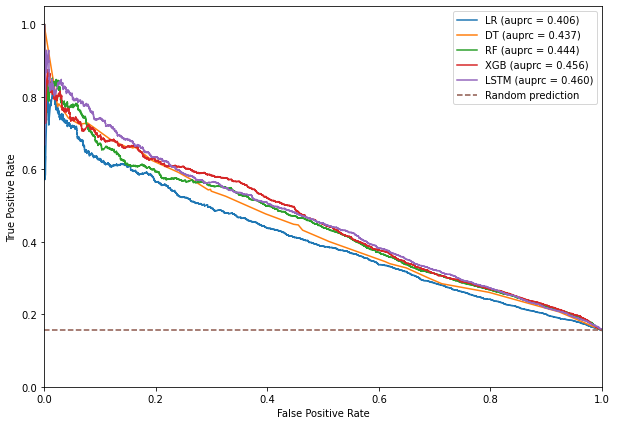

In [135]:
for target_outcome in target_outcomes:
    y_externalVal = externalEvaluationData[[target_outcome]]
    gridSearch_X, crossVal_X, internalEvaluation_X, externalEvaluation_X, gridSearch_tab, crossVal_tab, internalEvaluation_tab, externalEvaluation_tab, gridSearch_y, crossVal_y, internalEvaluation_y, externalEvaluation_y = pickle.load(open('../../Clean_data/seasonal_dataset_ordinal_'+target_outcome+'.sav', 'rb'))
    lr_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_LR.sav', 'rb'))
    dt_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_DT.sav', 'rb'))
    rf_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_RF.sav', 'rb'))
    xgb_model = pickle.load(open('../../MODELS/TestResultOrdinal/'+target_outcome+'_XGB.sav', 'rb'))
    lstm_model = load_model('../../MODELS/TestResultOrdinal/lstm_2years_new'+target_outcome+'.keras')
    
    #PLOT
    # Calculate ROC curve
    plt.figure(figsize=(10,7))

    #LR model
    preds2 = lr_model.predict_proba(X_externalVal)
    preds2 = [x[1] for x in preds2]
    lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_externalVal, preds2)
    lr_auprc = auc(lr_recall, lr_precision)
    plt.plot(lr_recall, lr_precision, label='LR (auprc = %0.3f)' % lr_auprc)

    #dt model
    preds3 = dt_model.predict_proba(X_externalVal)
    preds3 = [x[1] for x in preds3]
    dt_precision, dt_recall, dt_thresholds = precision_recall_curve(y_externalVal, preds3)
    dt_auprc = auc(dt_recall, dt_precision)
    plt.plot(dt_recall, dt_precision, label='DT (auprc = %0.3f)' % dt_auprc)

    #rf model
    preds4 = rf_model.predict_proba(X_externalVal)
    preds4 = [x[1] for x in preds4]
    rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_externalVal, preds4)
    rf_auprc = auc(rf_recall, rf_precision)
    plt.plot(rf_recall, rf_precision, label='RF (auprc = %0.3f)' % rf_auprc)

    #XGBoost all
    preds5 = xgb_model.predict_proba(X_externalVal)
    preds5 = [x[1] for x in preds5]
    xgb_precision, xgb_recall, xgb_thresholds = precision_recall_curve(y_externalVal, preds5)
    xgb_auprc = auc(xgb_recall, xgb_precision)
    plt.plot(xgb_recall, xgb_precision, label='XGB (auprc = %0.3f)' % xgb_auprc)

    #LSTM
    preds6 = lstm_model.predict([externalEvaluation_tab, externalEvaluation_X[:, :9, :]])
    preds6 = [x for x in preds6]
    lstm_precision, lstm_recall, lstm_thresholds = precision_recall_curve(externalEvaluation_y, preds6)
    lstm_auprc = auc(lstm_recall, lstm_precision)
    plt.plot(lstm_recall, lstm_precision, label='LSTM (auprc = %0.3f)' % lstm_auprc)


    no_skill = len(y_externalVal[y_externalVal[target_outcome]==1]) / len(y_externalVal)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random prediction')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve Comparison')
    plt.legend()
    plt.show()

## Feature importance

In [55]:
externalEvaluation_X.shape

(19678, 41, 11)

In [64]:
import shap
import numpy as np

model = load_model('../../MODELS/TestResultOrdinal/lstm_2years_new'+target_outcome+'.keras')

# Sample a subset for efficiency
background = [gridSearch_tab, gridSearch_X[:, :9, :]]
explainer = shap.GradientExplainer(model, background)



In [ ]:
# Explain predictions
inputs = [externalEvaluation_tab, externalEvaluation_X[:, :9, :]]
shap_values = explainer.shap_values(inputs)

In [69]:
externalEvaluation_tab

array([[1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 5.50e-03],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.25e-01, 0.00e+00, 8.25e-04],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.65e-03],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 5.50e-03]],
      dtype=float32)

In [86]:
from sklearn.metrics import roc_auc_score
import numpy as np

def perm_importance_tab(model, X_tab, X_seq, y):
    baseline = roc_auc_score(y, model.predict([X_tab, X_seq]))
    importances = []
    for i in range(X_tab.shape[1]):
        X_tab_perm = X_tab.copy()
        np.random.shuffle(X_tab_perm[:, i])
        score = roc_auc_score(y, model.predict([X_tab_perm, X_seq]))
        importances.append(baseline - score)
    return importances

def perm_importance_seq(model, X_tab, X_seq, y, axis=2):  # axis=1 for time, axis=2 for channels
    baseline = roc_auc_score(y, model.predict([X_tab, X_seq]))
    importances = []
    for i in range(X_seq.shape[axis]):
        X_seq_perm = X_seq.copy()
        if axis == 1:
            np.random.shuffle(X_seq_perm[:, i, :])
        else:
            np.random.shuffle(X_seq_perm[:, :, i])
        score = roc_auc_score(y, model.predict([X_tab, X_seq_perm]))
        importances.append(baseline - score)
    return importances

In [87]:
tab_importances = perm_importance_tab(model, externalEvaluation_tab, externalEvaluation_X[:,:9,:], externalEvaluation_y)

615/615 [==============================] - 11s 17ms/step


In [88]:
seq_importances = perm_importance_seq(model, externalEvaluation_tab, externalEvaluation_X[:,:9,:], externalEvaluation_y)

615/615 [==============================] - 8s 14ms/step


In [104]:
import matplotlib.pyplot as plt

tabular_vars = ['sex', 'rhinitis', 'cardiovascular', 'heartfailure', 'psoriasis', 'anaphylaxis', 'diabetes', 'ihd', 'anxiety', 'eczema', 
                    'nasalpolyps', 'ethnic_group_Asian', 'ethnic_group_Black', 'ethnic_group_Mixed',
                    'ethnic_group_Other', 'ethnic_group_White', 'ethnic_group_not recorded',
                    'smokingStatus_current', 'smokingStatus_former', 'smokingStatus_never',
                    'DeviceType_BAI', 'DeviceType_DPI', 'DeviceType_NEB', 'DeviceType_not recorded', 'DeviceType_pMDI', 
                    'PriorEducation_No', 'PriorEducation_Yes',  'BMI_cat',  'imd_decile', 'CharlsonScore', 'PEFStatus', 
                    'EosinophilLevel', 'BTS_step','age', 
                    'numAsthmaManagement', 'numAsthmaReview', 'ICS_medication_possesion_ratio',
                    ]

def plot_importance(importances, feature_names, title):
    plt.figure(figsize=(10, 15))
    plt.barh(feature_names, importances)
    plt.xlabel("Importance (AUC drop)")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

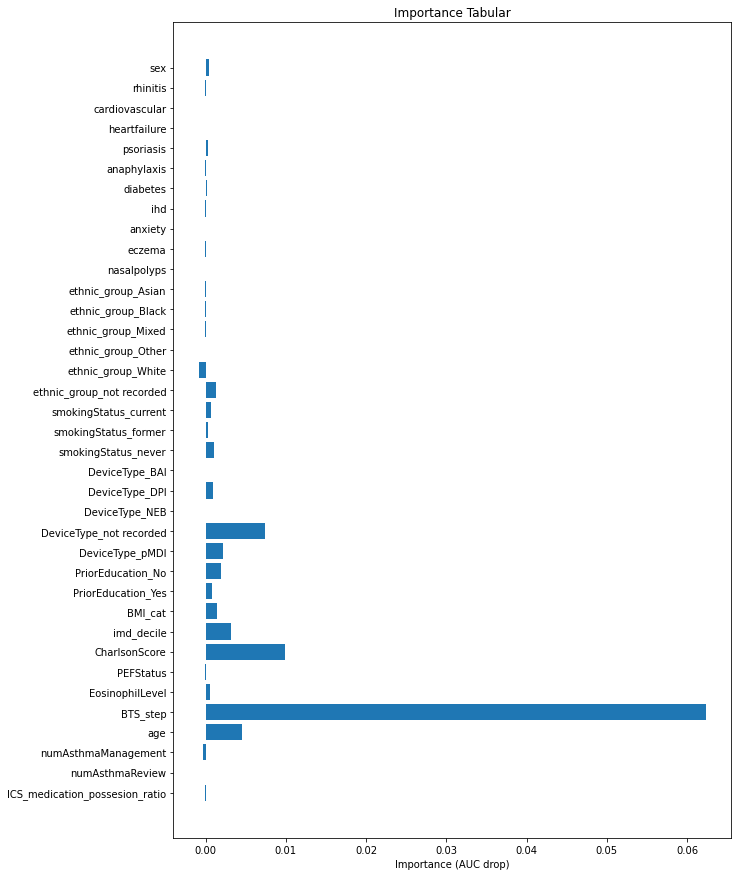

In [105]:
plot_importance(tab_importances, tabular_vars, 'Importance Tabular')

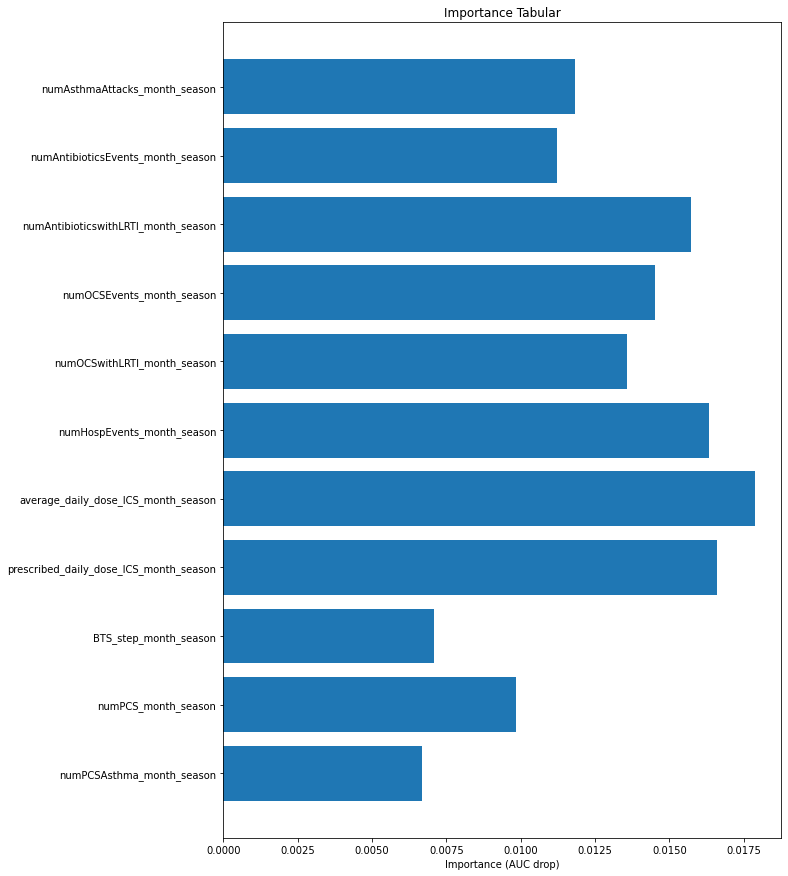

In [106]:
seq_vars = ['numAsthmaAttacks_month_season',
       'numAntibioticsEvents_month_season',
       'numAntibioticswithLRTI_month_season', 'numOCSEvents_month_season',
       'numOCSwithLRTI_month_season', 'numHospEvents_month_season',
       'average_daily_dose_ICS_month_season',
       'prescribed_daily_dose_ICS_month_season', 'BTS_step_month_season',
       'numPCS_month_season', 'numPCSAsthma_month_season']

plot_importance(seq_importances, seq_vars, 'Importance Tabular')

In [99]:
all_importance = tab_importances+seq_importances
all_vars = tabular_vars + seq_vars

<Figure size 720x1440 with 0 Axes>

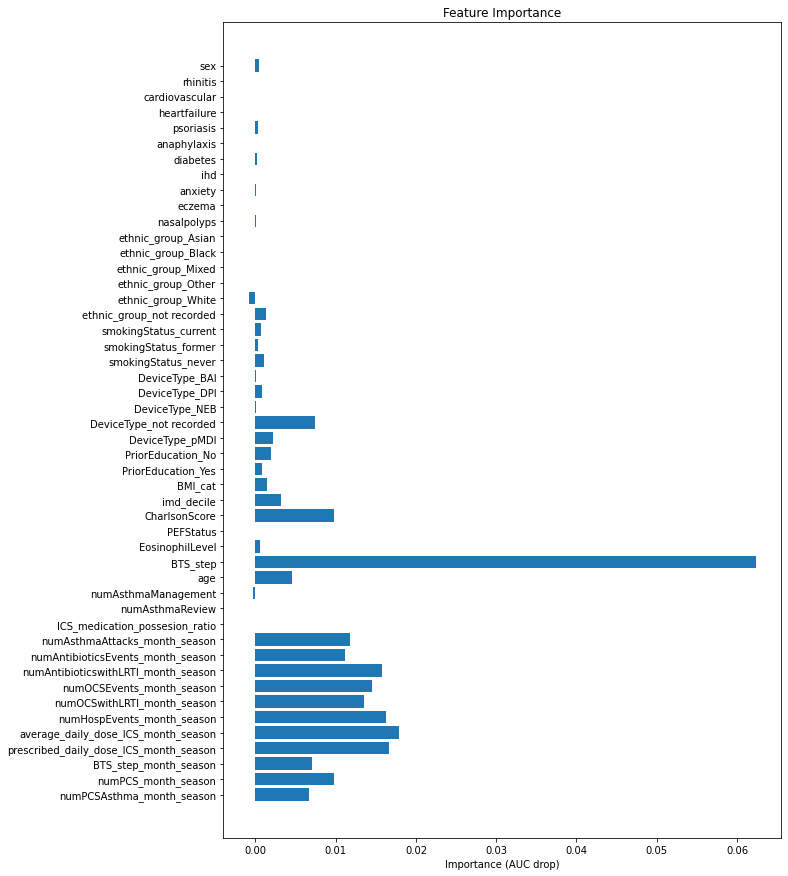

In [107]:
plt.figure(figsize=(10,20))
plot_importance(all_importance, all_vars, 'Feature Importance')

<AxesSubplot:>

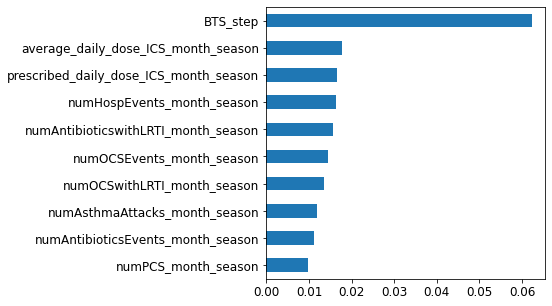

In [139]:
top_10 = pd.DataFrame(all_importance, all_vars, columns=['value']).sort_values('value', ascending=False)[:10]
top_10.sort_values('value').plot(kind='barh', figsize=(5,5), legend=False, fontsize=12)

## Model training

In [ ]:
# design network

set
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True)))
    model.add(Bidirectional(LSTM(50, return_sequences=True)))
    model.add(Bidirectional(LSTM(50, return_sequences=True)))
    model.add(Bidirectional(LSTM(50, return_sequences=True)))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.build(input_shape=(None,train_X.shape[1], train_X.shape[2]))
    model.summary()

    metrics = [
                AUC(num_thresholds=1000, name='auc', curve='ROC'),
                AUC(num_thresholds=1000, name='auprc', curve='PR'),
                # tf.keras.metrics.Precision(name='prec'),
                # tf.keras.metrics.Recall(name='rec'),
                # tf.keras.metrics.TrueNegatives(name='TN'),
                # tf.keras.metrics.TruePositives(name='TP'),
                # tf.keras.metrics.PrecisionAtRecall(0.8)
            ]

    opt = Adadelta(learning_rate=5e-2)

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics)
    # fit network
    earlyStopping = EarlyStopping(monitor='val_auc', patience=5, verbose=0, mode='max', restore_best_weights=True)
    history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(val_X, val_y), 
                        class_weight=class_weight, callbacks = [earlyStopping], verbose=2)




    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

predsraw = model.predict(test_X)


In [ ]:
preds = [0 if x < 0.83 else 1 for x in predsraw]
confusion_matrix(test_y, preds)

print(roc_auc_score(test_y, preds))
print(average_precision_score(test_y, preds))

In [ ]:
gridSearch_tab.shape

# Model with tabular and sequence

In [ ]:
# train_X, val_X, test_X, train_tab, val_tab, test_tab, train_y, val_y, test_y = pickle.load(open('../Clean_data/sequence_dataset_full.sav', 'rb'))
# print('sequence input: ', train_X.shape, val_X.shape, test_X.shape)
# print('tabular input: ', train_tab.shape, val_tab.shape, test_tab.shape)
# print('outcome: ', train_y.shape, val_y.shape, test_y.shape)

gridSearch_X, crossVal_X, internalEvaluation_X, externalEvaluation_X, gridSearch_tab, crossVal_tab, internalEvaluation_tab, externalEvaluation_tab, gridSearch_y, crossVal_y, internalEvaluation_y, externalEvaluation_y = pickle.load(open('../Clean_data/seasonal_dataset_full_05112024.sav', 'rb'))

In [ ]:
def modelCombined():
    
###################################################################################################################################################            
        #tabular data - demography   
        input1 = Input(shape=(crossVal_tab.shape[1],))
        nn = Dense(units=32, 
                    input_shape = (crossVal_tab.shape[1],)
                   )(input1)
        nn = BatchNormalization()(nn)
        nn = Activation("relu")(nn)
        nn = Dropout(.3)(nn)
        


###################################################################################################################################################                

        # LSTM - layer 1
        
        input2 = Input(shape=(crossVal_X.shape[1], crossVal_X.shape[2]))
        lstm = Bidirectional(LSTM(units=50, 
                            return_sequences=True,
                                 )
                            )(input2)
        lstm = Dropout(.3)(lstm)
        

        # LSTM - layer 2
        lstm = Bidirectional(LSTM(units=32, 
                            # return_sequences=True,
                                 )
                            )(lstm)
        lstm = Dropout(.3)(lstm)
        
        
###################################################################################################################################################        

        ##layer 4 - FCN before classification layer
        #merge tabular and sequence layers
        # nn = Reshape((1, 64))(nn) #reshape the nn product to be concatenated with LSTM product
        add = concatenate([nn, lstm], axis=1)

        final = Dense(units=16)(add)
        final = BatchNormalization()(final)
        final = Activation("relu")(final)
        final = Dropout(0.3)(final)     
        
                                                    
        ###layer 5 - classification layer
        # final = Flatten()(add)
        output = Dense(1, activation='sigmoid')(final)
        

        opt = Adamax(learning_rate=1e-4)
        # opt = RMSprop(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, weight_decay=weight_decay)

        metrics = [
            AUC(num_thresholds=1000, name='auc', curve='ROC'),
            AUC(num_thresholds=1000, name='auprc', curve='PR'),
        ]


        model = Model(inputs=[input1, input2], outputs=output)
        model.compile(
            loss='binary_crossentropy', 
            optimizer=opt, 
            metrics=metrics)
        # print(model.summary())
        return model

In [ ]:
set
with tf.device('/GPU:0'):
    model = modelCombined()
    model.summary()

In [ ]:
set
with tf.device('/GPU:0'):
    earlyStopping = EarlyStopping(monitor='val_auc', patience=10, verbose=0, mode='max', restore_best_weights=True)
    # mcp_save = ModelCheckpoint('../SeqModel/lstm_CV_18+_'+set_vocab+str(fold_var)+'.h5', save_best_only=True, monitor='val_auc', mode='max')
    # class_weight = trainingData['outcome_12months'].value_counts()[0]/trainingData['outcome_12months'].value_counts()[1]
    class_weight = np.unique(gridSearch_y, return_counts=True)[1][0]/np.unique(gridSearch_y, return_counts=True)[1][1]
    class_weight = {0:1, 1:class_weight}

    history = model.fit([gridSearch_tab, gridSearch_X], gridSearch_y,
                        validation_split=.2,
                        # validation_data=([val_tab, val_X], val_y),
                        epochs=1000, batch_size=128, class_weight=class_weight, callbacks = [earlyStopping])

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='loss train')
pyplot.plot(history.history['val_loss'], label='loss val')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['auc'], label='auc train')
pyplot.plot(history.history['val_auc'], label='auc val')
pyplot.legend()
pyplot.show()

In [ ]:
model.evaluate([externalEvaluation_tab,externalEvaluation_X], externalEvaluation_y)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

predsraw = model.predict([externalEvaluation_tab,externalEvaluation_X])


In [ ]:
preds = [0 if x <= 0.55 else 1 for x in predsraw]
confusion_matrix(externalEvaluation_y, preds)

print(roc_auc_score(externalEvaluation_y, preds))
print(average_precision_score(externalEvaluation_y, preds))

In [ ]:
confusion_matrix(externalEvaluation_y, preds)

In [ ]:
#load clinical information
path = '../ServerData_13Oct2020/'
clinical_files = [join(path, f) for f in listdir(path) if (isfile(join(path, f))) & ('f_clinical_part' in f)]
clinical = pyreadr.read_r('../ServerData_13Oct2020/f_clinical_part1.Rdata')
clinical = clinical['f_clinical_part']
# for file in clinical_files[1:3]:
#     temp = pyreadr.read_r(file)
#     temp = temp['f_clinical_part']
#     print(temp.shape)
#     clinical = pd.concat([clinical, temp])
#     clinical.reset_index(drop=True, inplace=True)

In [ ]:
clinical.head(3)

In [ ]:
def combine_code_numeric(code, numeric):
    if (numeric != np.nan):
        return(code+str(numeric))
    else:
        return (code)
        

In [ ]:
clinical = clinical.dropna(subset='code_id').reset_index(drop=True)

In [ ]:
clinical.apply(lambda x: combine_code_numeric(x.code_id, x.numeric_1), axis=1)

In [ ]:
from datetime import datetime

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month


diff_month(datetime(2018,1,1), datetime(2016,1,1))
